### objective- to predict the likeleyhood of a hit song using log regression

<a id="2"></a> 
## Import Libraries

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import random
import string

from matplotlib.pyplot import xticks
%matplotlib inline


#### final list of shortlisted song attributes 

'valence' A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

-'acousticness', A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

-'danceability', Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable 

-'energy', Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

-'explicit', explicit lyrics - binary classifier 

-'liveness', Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

-'loudness', The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

-'release_date', last five years yes or no? -binary classfier 

-'speechiness' Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.

In [2]:
df_rcs=pd.read_csv('new_DF.csv')

In [3]:
df_rcs.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df_rcs.isnull().sum()

valence             0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [5]:
df_rcs.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,1921,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,1921,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,1921,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,1921,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,1921,0.0380,101.665


In [6]:
nums=['valence','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo']

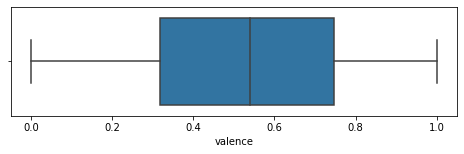

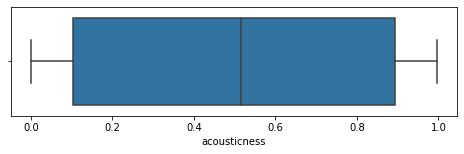

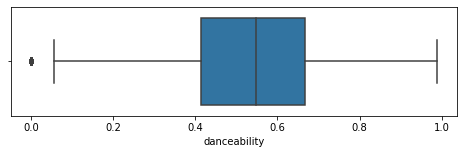

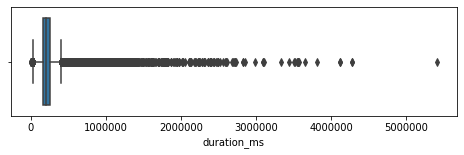

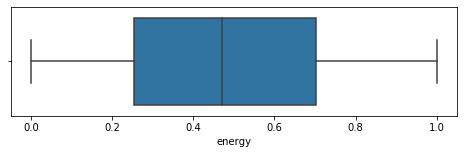

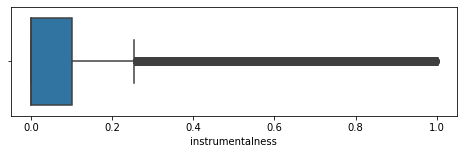

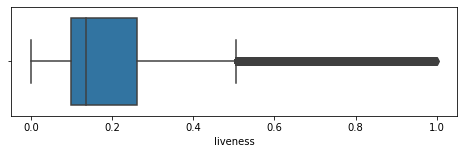

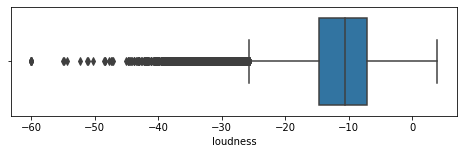

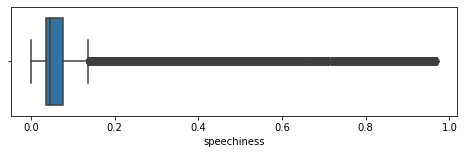

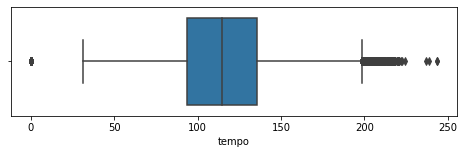

In [7]:
for n in nums: 
    
    plt.subplots(1,1, figsize = (8,2)) 
    sns.boxplot(x = n, data = df_rcs)
plt.show()

In [8]:
nums2=['duration_ms','instrumentalness','liveness','loudness','speechiness','tempo']

In [9]:
for p in nums2: 
    percentiles = df_rcs[p].quantile([0.10,0.85]).values
    df_rcs[p][df_rcs[p] <= percentiles[0]] = percentiles[0]
    df_rcs[p][df_rcs[p] >= percentiles[1]] = percentiles[1]

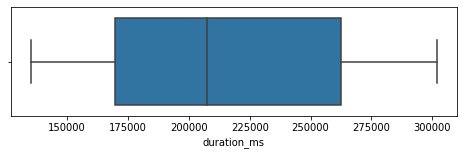

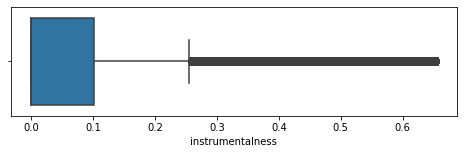

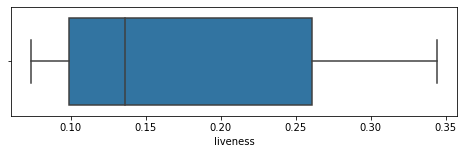

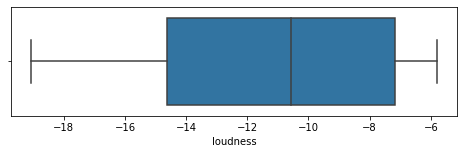

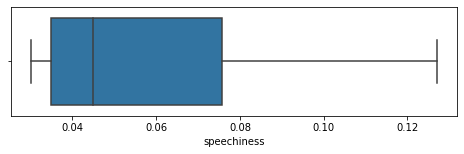

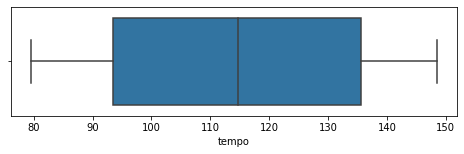

In [10]:
for t in nums2: 
    
    plt.subplots(1,1, figsize = (8,2)) 
    sns.boxplot(x = t, data = df_rcs)
plt.show()

In [11]:
df_rcs.drop(columns='instrumentalness',inplace=True)

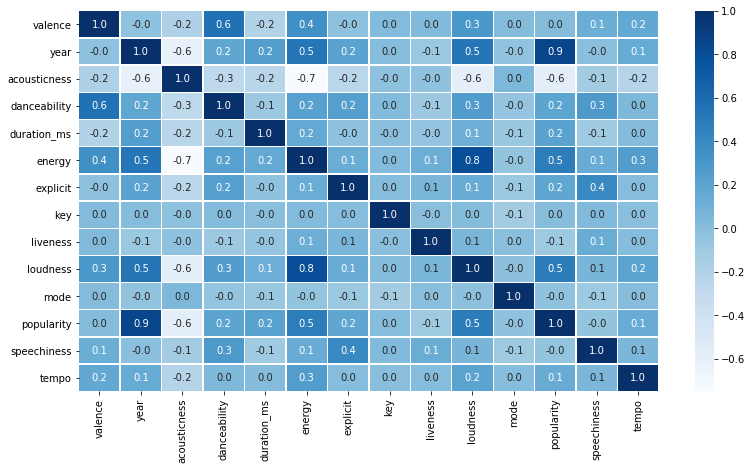

In [12]:
plt.subplots(figsize=(13, 7))
sns.heatmap(df_rcs.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',cmap="Blues")
plt.show() 


In [13]:
#importing libraries for LOG REG 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
df_rcs.columns

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'release_date', 'speechiness', 'tempo'],
      dtype='object')

In [15]:
df_rcs["popularity_bin"]= [ 1 if i>=66.5 else 0 for i in df_rcs.popularity ] #arbitary value
df_rcs["popularity_bin"].value_counts()

0    162924
1      7729
Name: popularity_bin, dtype: int64

In [16]:


df_rcs['release_date'] = pd.to_datetime(df_rcs['release_date']).dt.year
df_rcs.head()

#pd.to_datetime('13000101', format='%Y%m%d', errors='coerce')

,valence,year,acousticness,danceability,duration_ms,energy,explicit,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,popularity_bin
0,0.0594,1921,0.982,0.279,301827,0.211,0,10,0.344,-19.076,1,4,1921,0.0366,80.954,0
1,0.9630,1921,0.732,0.819,180533,0.341,0,7,0.160,-12.441,1,5,1921,0.1270,79.543,0
2,0.0394,1921,0.961,0.328,301827,0.166,0,3,0.101,-14.850,1,5,1921,0.0339,110.339,0
3,0.1650,1921,0.967,0.275,210000,0.309,0,5,0.344,-9.316,1,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,0.418,166693,0.193,0,3,0.229,-10.096,1,2,1921,0.0380,101.665,0


In [17]:
df_rcs['release_date']

0         1921
1         1921
2         1921
3         1921
4         1921
          ... 
170648    2020
170649    2020
170650    2020
170651    2020
170652    2020
Name: release_date, Length: 170653, dtype: int64

In [18]:
df_rcs['release_date']= [ 1 if i>=2015 else 0 for i in df_rcs.release_date ] #anything last  1 year is new 
df_rcs['release_date'].value_counts()

0    158808
1     11845
Name: release_date, dtype: int64

In [19]:
y = df_rcs['popularity_bin']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: popularity_bin, dtype: int64

In [20]:
# Putting feature variable to X
# removing the customer ID and target variables 
X = df_rcs.drop(['popularity','popularity_bin','year'], axis=1)

In [21]:
X.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,key,liveness,loudness,mode,release_date,speechiness,tempo
0,0.0594,0.982,0.279,301827,0.211,0,10,0.344,-19.076,1,0,0.0366,80.954
1,0.9630,0.732,0.819,180533,0.341,0,7,0.160,-12.441,1,0,0.1270,79.543
2,0.0394,0.961,0.328,301827,0.166,0,3,0.101,-14.850,1,0,0.0339,110.339
3,0.1650,0.967,0.275,210000,0.309,0,5,0.344,-9.316,1,0,0.0354,100.109
4,0.2530,0.957,0.418,166693,0.193,0,3,0.229,-10.096,1,0,0.0380,101.665


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [23]:
scaly = StandardScaler()

X_train[['valence','acousticness','danceability','duration_ms','energy','key','liveness','loudness','speechiness','tempo']] = scaly.fit_transform(X_train[['valence','acousticness','danceability','duration_ms','energy','key','liveness','loudness','speechiness','tempo']])

X_train.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,key,liveness,loudness,mode,release_date,speechiness,tempo
61783,-1.566268,1.297499,-2.142619,0.765659,-0.725637,0,0.512342,-0.888062,-0.509022,1,0,-0.464627,-1.473357
101786,-0.206674,-1.329083,-0.751850,1.022132,1.802675,0,1.081649,-0.133907,1.227867,1,0,0.380725,0.080171
84289,-0.396562,1.036947,0.241556,1.550604,-0.288691,0,1.650956,-0.164731,0.505610,0,0,-0.714993,0.034347
46612,0.959234,-0.728430,-0.388547,-0.889077,0.151990,0,-0.056966,1.263438,-0.389773,1,0,0.657601,1.027244
69275,-0.388966,0.638142,-0.740497,-0.658686,-0.923570,0,-1.480234,1.427831,0.642442,1,0,-0.735611,0.347059


In [24]:
logreg_model = LogisticRegression()

In [25]:
rfe = RFE(logreg_model, 10)   

In [26]:
rfe = rfe.fit(X_train, y_train)

In [27]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False])

In [28]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('valence', True, 1),
 ('acousticness', True, 1),
 ('danceability', True, 1),
 ('duration_ms', False, 4),
 ('energy', True, 1),
 ('explicit', True, 1),
 ('key', False, 2),
 ('liveness', True, 1),
 ('loudness', True, 1),
 ('mode', True, 1),
 ('release_date', True, 1),
 ('speechiness', True, 1),
 ('tempo', False, 3)]

In [29]:
col = X_train.columns[rfe.support_]  #accepted features 
col

Index(['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'liveness', 'loudness', 'mode', 'release_date', 'speechiness'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]  #rejected features 

Index(['duration_ms', 'key', 'tempo'], dtype='object')

In [31]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         popularity_bin   No. Observations:               119457
Model:                            GLM   Df Residuals:                   119446
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14996.
Date:                Wed, 16 Dec 2020   Deviance:                       29992.
Time:                        18:38:05   Pearson chi2:                 9.43e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.2506      0.037   -115.106      0.000      -4.323      -4.178
valence         -0.1004      0.021     -4.723      0.000      -0.142      -0.059
acousticness    -0.2836      0.028    -10.094      0.000      -0.339      -0.229
danceability     0.2165      0.022      9.874      0.000       0.174       0.260
energy          -0.2121      0.036     -5.905      0.000      -0.282      -0.142
explicit         0.2272      0.046      4.949      0.000       0.137       0.317
liveness        -0.1016      0.017     -5.927      0.000      -0.135      -0.068
loudness         0.8569      0.036     23.494      0.000       0.785       0.928
mode            -0.0191      0.034     -0.558      0.577      -0.086       0.048
release_date     2.8090      0.037     75.651      0.000       2.736       2.882
speechiness     -0.0747      0.018     -4.264      0.000      -0.109      -0.040
================================================================================
"""

In [32]:
X_train.drop(columns=['mode'],inplace=True)

In [33]:
rfe = rfe.fit(X_train, y_train)

In [34]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False])

In [35]:
col2 = X_train.columns[rfe.support_]  #accepted features 
col2

Index(['valence', 'acousticness', 'danceability', 'energy', 'explicit', 'key',
       'liveness', 'loudness', 'release_date', 'speechiness'],
      dtype='object')

In [36]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         popularity_bin   No. Observations:               119457
Model:                            GLM   Df Residuals:                   119446
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14996.
Date:                Wed, 16 Dec 2020   Deviance:                       29992.
Time:                        18:38:07   Pearson chi2:                 9.42e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.2643      0.028   -154.588      0.000      -4.318      -4.210
valence         -0.1005      0.021     -4.725      0.000      -0.142      -0.059
acousticness    -0.2837      0.028    -10.096      0.000      -0.339      -0.229
danceability     0.2170      0.022      9.902      0.000       0.174       0.260
energy          -0.2113      0.036     -5.887      0.000      -0.282      -0.141
explicit         0.2279      0.046      4.965      0.000       0.138       0.318
key             -0.0043      0.016     -0.271      0.787      -0.035       0.027
liveness        -0.1017      0.017     -5.929      0.000      -0.135      -0.068
loudness         0.8566      0.036     23.489      0.000       0.785       0.928
release_date     2.8100      0.037     75.745      0.000       2.737       2.883
speechiness     -0.0739      0.017     -4.225      0.000      -0.108      -0.040
================================================================================
"""

In [37]:
X_train.drop(columns=['key'],inplace=True)

In [38]:
rfe = rfe.fit(X_train, y_train)

In [39]:
col3 = X_train.columns[rfe.support_]  #accepted features 
col3

Index(['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'liveness', 'loudness', 'release_date', 'speechiness', 'tempo'],
      dtype='object')

In [40]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         popularity_bin   No. Observations:               119457
Model:                            GLM   Df Residuals:                   119446
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14996.
Date:                Wed, 16 Dec 2020   Deviance:                       29992.
Time:                        18:38:09   Pearson chi2:                 9.42e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.2643      0.028   -154.586      0.000      -4.318      -4.210
valence         -0.1007      0.021     -4.729      0.000      -0.142      -0.059
acousticness    -0.2837      0.028    -10.067      0.000      -0.339      -0.228
danceability     0.2171      0.022      9.853      0.000       0.174       0.260
energy          -0.2115      0.036     -5.886      0.000      -0.282      -0.141
explicit         0.2281      0.046      4.971      0.000       0.138       0.318
liveness        -0.1016      0.017     -5.923      0.000      -0.135      -0.068
loudness         0.8565      0.036     23.487      0.000       0.785       0.928
release_date     2.8099      0.037     75.611      0.000       2.737       2.883
speechiness     -0.0740      0.018     -4.228      0.000      -0.108      -0.040
tempo            0.0004      0.017      0.026      0.980      -0.033       0.034
================================================================================
"""

In [41]:
X_train.drop(columns=['tempo'],inplace=True)

In [42]:
rfe = rfe.fit(X_train, y_train)

In [43]:
col4 = X_train.columns[rfe.support_]  #accepted features 
col4

Index(['valence', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'liveness', 'loudness', 'release_date', 'speechiness'],
      dtype='object')

In [44]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         popularity_bin   No. Observations:               119457
Model:                            GLM   Df Residuals:                   119446
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14996.
Date:                Wed, 16 Dec 2020   Deviance:                       29992.
Time:                        18:38:10   Pearson chi2:                 9.42e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.2644      0.028   -154.383      0.000      -4.318      -4.210
valence         -0.1005      0.022     -4.622      0.000      -0.143      -0.058
acousticness    -0.2836      0.028    -10.024      0.000      -0.339      -0.228
danceability     0.2170      0.022      9.903      0.000       0.174       0.260
duration_ms      0.0006      0.019      0.031      0.975      -0.038       0.039
energy          -0.2115      0.036     -5.880      0.000      -0.282      -0.141
explicit         0.2282      0.046      4.966      0.000       0.138       0.318
liveness        -0.1016      0.017     -5.922      0.000      -0.135      -0.068
loudness         0.8565      0.036     23.488      0.000       0.785       0.928
release_date     2.8101      0.038     74.393      0.000       2.736       2.884
speechiness     -0.0740      0.017     -4.227      0.000      -0.108      -0.040
================================================================================
"""

In [45]:
X_train.drop(columns=['duration_ms'],inplace=True)

In [46]:
rfe = rfe.fit(X_train, y_train)

In [47]:
col5 = X_train.columns[rfe.support_]  #accepted features 
col5

Index(['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'liveness', 'loudness', 'release_date', 'speechiness'],
      dtype='object')

In [48]:
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         popularity_bin   No. Observations:               119457
Model:                            GLM   Df Residuals:                   119447
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14996.
Date:                Wed, 16 Dec 2020   Deviance:                       29992.
Time:                        18:38:11   Pearson chi2:                 9.42e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.2643      0.028   -154.587      0.000      -4.318      -4.210
valence         -0.1006      0.021     -4.736      0.000      -0.142      -0.059
acousticness    -0.2837      0.028    -10.098      0.000      -0.339      -0.229
danceability     0.2170      0.022      9.905      0.000       0.174       0.260
energy          -0.2114      0.036     -5.891      0.000      -0.282      -0.141
explicit         0.2281      0.046      4.971      0.000       0.138       0.318
liveness        -0.1016      0.017     -5.926      0.000      -0.135      -0.068
loudness         0.8565      0.036     23.488      0.000       0.785       0.928
release_date     2.8099      0.037     75.747      0.000       2.737       2.883
speechiness     -0.0740      0.017     -4.235      0.000      -0.108      -0.040
================================================================================
"""

##### all features seem statistically significant 

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#scaling X_test


scaly = StandardScaler()

X_test[['valence','acousticness','danceability','duration_ms','energy','key','liveness','loudness','speechiness','tempo']] = scaly.fit_transform(X_test[['valence','acousticness','danceability','duration_ms','energy','key','liveness','loudness','speechiness','tempo']])

X_test.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,key,liveness,loudness,mode,release_date,speechiness,tempo
32557,0.871356,-1.240057,2.275806,-0.065683,0.543873,0,-0.340696,1.569490,0.823661,0,0,1.954264,0.233392
120898,-0.445057,-1.334878,-0.382071,0.420951,1.703365,1,1.648029,-1.074255,1.220630,0,0,1.954264,-0.780000
48568,-0.886398,0.416618,-0.796655,1.552492,-0.480969,0,0.511615,-0.274744,-0.438626,0,0,-0.894916,1.342567
89576,-0.833132,-1.287953,0.060908,0.272701,0.970267,0,1.079822,-0.254138,1.225359,1,0,-0.315671,0.318059
117852,0.631663,-1.289550,-1.427049,-1.053536,0.682264,0,-0.056592,-0.254138,-1.030140,1,0,-0.383299,-0.030797


In [52]:
X_test.drop(columns=['duration_ms','tempo','key','mode'],inplace=True)

In [53]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
model.score(X_test,y_test)

0.9541761075083991

In [55]:
y_test.value_counts()

0    48877
1     2319
Name: popularity_bin, dtype: int64

#### retesting model with stats api RES model

In [56]:
y_train_pred = res.predict(X_train_sm)
y_train_pred

61783     0.006073
101786    0.033130
84289     0.019793
46612     0.008313
69275     0.019607
            ...   
82270     0.007276
65615     0.009087
77655     0.002134
56088     0.039820
38408     0.032684
Length: 119457, dtype: float64

In [57]:
y_train.values #original y target values for training set 

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
y_train_pred_DF = pd.DataFrame({'Converted_y':y_train.values, 'Converted_prob_y':y_train_pred})
y_train_pred_DF['SongID'] = y_train.index  #to replace original alphanumeric 
y_train_pred_DF.head()

,Converted_y,Converted_prob_y,SongID
61783,0,0.006073,61783
101786,0,0.033130,101786
84289,0,0.019793,84289
46612,0,0.008313,46612
69275,0,0.019607,69275


let's create a new column for predicted values above 'Converted_prob' >0.5
this is an arbitary amount - which we will fine tune after the model evaluation
we can now convert the 'Converted_prob_y' column to binary adding the filter of above or beow 0.5

In [59]:
y_train_pred_DF['predicted_y_OHE'] = y_train_pred_DF.Converted_prob_y.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_DF.head()

,Converted_y,Converted_prob_y,SongID,predicted_y_OHE
61783,0,0.006073,61783,0
101786,0,0.033130,101786,0
84289,0,0.019793,84289,0
46612,0,0.008313,46612,0
69275,0,0.019607,69275,0


In [60]:
confusion_mat = metrics.confusion_matrix(y_train_pred_DF.Converted_y, y_train_pred_DF.predicted_y_OHE )
print(confusion_mat)

[[113154    893]
 [  4605    805]]


In [61]:
accuracy= (metrics.accuracy_score(y_train_pred_DF.Converted_y, y_train_pred_DF.predicted_y_OHE))
print('the model has a {} accuracy'.format(accuracy))

the model has a 0.9539750705274701 accuracy


In [62]:
from sklearn.metrics import precision_recall_curve 

In [63]:
# so i'm creating columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_DF[i]= y_train_pred_DF.Converted_prob_y.map(lambda x: 1 if x > i else 0)
y_train_pred_DF.head()

,Converted_y,Converted_prob_y,SongID,predicted_y_OHE,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
61783,0,0.006073,61783,0,1,0,0,0,0,0,0,0,0,0
101786,0,0.033130,101786,0,1,0,0,0,0,0,0,0,0,0
84289,0,0.019793,84289,0,1,0,0,0,0,0,0,0,0,0
46612,0,0.008313,46612,0,1,0,0,0,0,0,0,0,0,0
69275,0,0.019607,69275,0,1,0,0,0,0,0,0,0,0,0


In [64]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_DF.Converted_y, y_train_pred_DF[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.045288     1.000000     0.000000
0.1          0.1  0.942113     0.599076     0.958386
0.2          0.2  0.943461     0.576710     0.960858
0.3          0.3  0.945353     0.524769     0.965304
0.4          0.4  0.950158     0.395564     0.976466
0.5          0.5  0.953975     0.148799     0.992170
0.6          0.6  0.954461     0.016081     0.998974
0.7          0.7  0.954703     0.000000     0.999991
0.8          0.8  0.954712     0.000000     1.000000
0.9          0.9  0.954712     0.000000     1.000000


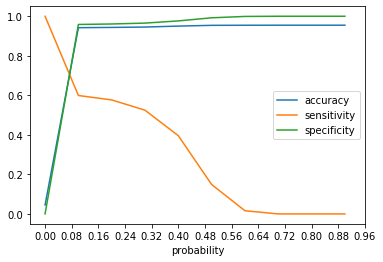

In [65]:

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])

plt.xticks(np.arange(0,1,0.08))

plt.show()

#optimal cutoff of target shows approx 0.07 - so re-running the model 

In [66]:
y_train_pred_DF['y_OHEpostCutoff'] = y_train_pred_DF.Converted_prob_y.map( lambda x: 1 if x > 0.20 else 0)

y_train_pred_DF.head()

,Converted_y,Converted_prob_y,SongID,predicted_y_OHE,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,y_OHEpostCutoff
61783,0,0.006073,61783,0,1,0,0,0,0,0,0,0,0,0,0
101786,0,0.033130,101786,0,1,0,0,0,0,0,0,0,0,0,0
84289,0,0.019793,84289,0,1,0,0,0,0,0,0,0,0,0,0
46612,0,0.008313,46612,0,1,0,0,0,0,0,0,0,0,0,0
69275,0,0.019607,69275,0,1,0,0,0,0,0,0,0,0,0,0


In [67]:
y_train_pred_DF['song_popularity_newScoring'] = y_train_pred_DF.Converted_prob_y.map( lambda x: round(x*100))

y_train_pred_DF.head()

,Converted_y,Converted_prob_y,SongID,predicted_y_OHE,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,y_OHEpostCutoff,song_popularity_newScoring
61783,0,0.006073,61783,0,1,0,0,0,0,0,0,0,0,0,0,1
101786,0,0.033130,101786,0,1,0,0,0,0,0,0,0,0,0,0,3
84289,0,0.019793,84289,0,1,0,0,0,0,0,0,0,0,0,0,2
46612,0,0.008313,46612,0,1,0,0,0,0,0,0,0,0,0,0,1
69275,0,0.019607,69275,0,1,0,0,0,0,0,0,0,0,0,0,2


In [68]:
from sklearn.metrics import f1_score

In [69]:
f1_score(y_train_pred_DF.Converted_y, y_train_pred_DF.y_OHEpostCutoff)

0.48022164075727264

In [70]:
p=precision_score(y_train_pred_DF.Converted_y , y_train_pred_DF.y_OHEpostCutoff)
r=recall_score(y_train_pred_DF.Converted_y, y_train_pred_DF.y_OHEpostCutoff)
print('the models precision score is {} and the models recall score is {}'.format(p,r))
print('the model has a {} accuracy'.format(accuracy))

the models precision score is 0.41139240506329117 and the models recall score is 0.5767097966728281
the model has a 0.954711737277849 accuracy


In [71]:
X_test.columns

Index(['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'liveness', 'loudness', 'release_date', 'speechiness'],
      dtype='object')

In [72]:
X_test[['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'liveness', 'loudness', 'speechiness']] = scaly.fit_transform(X_test[['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'liveness', 'loudness', 'speechiness']])

X_test.head()


,valence,acousticness,danceability,energy,explicit,liveness,loudness,release_date,speechiness
32557,0.871356,-1.240057,2.275806,0.543873,-0.300147,1.569490,0.823661,0,1.954264
120898,-0.445057,-1.334878,-0.382071,1.703365,3.331698,-1.074255,1.220630,0,1.954264
48568,-0.886398,0.416618,-0.796655,-0.480969,-0.300147,-0.274744,-0.438626,0,-0.894916
89576,-0.833132,-1.287953,0.060908,0.970267,-0.300147,-0.254138,1.225359,0,-0.315671
117852,0.631663,-1.289550,-1.427049,0.682264,-0.300147,-0.254138,-1.030140,0,-0.383299


In [73]:
X_test = X_test[col5]
X_test.head()

,valence,acousticness,danceability,energy,explicit,liveness,loudness,release_date,speechiness
32557,0.871356,-1.240057,2.275806,0.543873,-0.300147,1.569490,0.823661,0,1.954264
120898,-0.445057,-1.334878,-0.382071,1.703365,3.331698,-1.074255,1.220630,0,1.954264
48568,-0.886398,0.416618,-0.796655,-0.480969,-0.300147,-0.274744,-0.438626,0,-0.894916
89576,-0.833132,-1.287953,0.060908,0.970267,-0.300147,-0.254138,1.225359,0,-0.315671
117852,0.631663,-1.289550,-1.427049,0.682264,-0.300147,-0.254138,-1.030140,0,-0.383299


In [74]:
X_test_sm = sm.add_constant(X_test)

In [75]:
y_test_pred = res.predict(X_test_sm) #running the final model 

In [76]:
y_pred_1_DF = pd.DataFrame(y_test_pred) #making dataframe from y_test 

In [77]:

y_test_df = pd.DataFrame(y_test)  # Converting original y_test to dataframe

In [78]:
# matching songID as done earlier 
y_test_df['SongID'] = y_test_df.index

In [79]:
y_pred_1_DF.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final_DF = pd.concat([y_test_df, y_pred_1_DF],axis=1)

In [80]:
y_pred_final_DF= y_pred_final_DF.rename(columns={ 0 : 'Converted_prob'})
y_pred_final_DF.head()

,popularity_bin,SongID,Converted_prob
0,0,32557,0.035976
1,0,120898,0.074896
2,0,48568,0.008884
3,0,89576,0.048489
4,0,117852,0.004905


In [81]:
y_pred_final_DF['final_predicted'] = y_pred_final_DF.Converted_prob.map(lambda x: 1 if x > 0.20 else 0)

In [82]:
y_pred_final_DF.head()  

,popularity_bin,SongID,Converted_prob,final_predicted
0,0,32557,0.035976,0
1,0,120898,0.074896,0
2,0,48568,0.008884,0
3,0,89576,0.048489,0
4,0,117852,0.004905,0


In [83]:
fin=metrics.accuracy_score(y_pred_final_DF.popularity_bin, y_pred_final_DF.final_predicted)
print('the accuracy of the testing model is {}'.format(fin))

the accuracy of the testing model is 0.9438628017813891


In [84]:
f1_score(y_pred_final_DF.popularity_bin, y_pred_final_DF.final_predicted)

0.47439648866130213

In [85]:
model_a=res.params
pd.DataFrame(model_a)

,0
const,-4.264308
valence,-0.100628
acousticness,-0.283720
danceability,0.217046
energy,-0.211444
explicit,0.228115
liveness,-0.101617
loudness,0.856537
release_date,2.809916
speechiness,-0.073998


In [86]:
X_test.head()

,valence,acousticness,danceability,energy,explicit,liveness,loudness,release_date,speechiness
32557,0.871356,-1.240057,2.275806,0.543873,-0.300147,1.569490,0.823661,0,1.954264
120898,-0.445057,-1.334878,-0.382071,1.703365,3.331698,-1.074255,1.220630,0,1.954264
48568,-0.886398,0.416618,-0.796655,-0.480969,-0.300147,-0.274744,-0.438626,0,-0.894916
89576,-0.833132,-1.287953,0.060908,0.970267,-0.300147,-0.254138,1.225359,0,-0.315671
117852,0.631663,-1.289550,-1.427049,0.682264,-0.300147,-0.254138,-1.030140,0,-0.383299


In [87]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         popularity_bin   No. Observations:               119457
Model:                            GLM   Df Residuals:                   119447
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14996.
Date:                Wed, 16 Dec 2020   Deviance:                       29992.
Time:                        18:38:16   Pearson chi2:                 9.42e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.2643      0.028   -154.587      0.000      -4.318      -4.210
valence         -0.1006      0.021     -4.736      0.000      -0.142      -0.059
acousticness    -0.2837      0.028    -10.098      0.000      -0.339      -0.229
danceability     0.2170      0.022      9.905      0.000       0.174       0.260
energy          -0.2114      0.036     -5.891      0.000      -0.282      -0.141
explicit         0.2281      0.046      4.971      0.000       0.138       0.318
liveness        -0.1016      0.017     -5.926      0.000      -0.135      -0.068
loudness         0.8565      0.036     23.488      0.000       0.785       0.928
release_date     2.8099      0.037     75.747      0.000       2.737       2.883
speechiness     -0.0740      0.017     -4.235      0.000      -0.108      -0.040
================================================================================
"""

In [88]:
res.predict(X_test_sm)

32557     0.035976
120898    0.074896
48568     0.008884
89576     0.048489
117852    0.004905
            ...   
42047     0.001607
36369     0.060262
132408    0.026853
101523    0.015472
42567     0.006579
Length: 51196, dtype: float64

In [89]:
y_pred_final_DF.final_predicted.value_counts()

0    48047
1     3149
Name: final_predicted, dtype: int64

In [90]:
#res.predict()
X_test_sm

,const,valence,acousticness,danceability,energy,explicit,liveness,loudness,release_date,speechiness
32557,1.0,0.871356,-1.240057,2.275806,0.543873,-0.300147,1.569490,0.823661,0,1.954264
120898,1.0,-0.445057,-1.334878,-0.382071,1.703365,3.331698,-1.074255,1.220630,0,1.954264
48568,1.0,-0.886398,0.416618,-0.796655,-0.480969,-0.300147,-0.274744,-0.438626,0,-0.894916
89576,1.0,-0.833132,-1.287953,0.060908,0.970267,-0.300147,-0.254138,1.225359,0,-0.315671
117852,1.0,0.631663,-1.289550,-1.427049,0.682264,-0.300147,-0.254138,-1.030140,0,-0.383299
...,...,...,...,...,...,...,...,...,...,...
42047,1.0,-1.030975,1.209565,-1.120370,-1.004611,-0.300147,1.713732,-1.763284,0,1.954264
36369,1.0,0.639272,-1.312061,0.975264,0.360598,3.331698,1.713732,0.576202,0,0.072453
132408,1.0,1.274651,-1.292477,0.787849,1.482688,-0.300147,-1.074255,0.580705,0,-0.542076
101523,1.0,-0.144489,-0.998980,-0.330958,0.311974,-0.300147,-0.779590,-0.147035,0,-0.894916


In [91]:
res.params
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         popularity_bin   No. Observations:               119457
Model:                            GLM   Df Residuals:                   119447
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14996.
Date:                Wed, 16 Dec 2020   Deviance:                       29992.
Time:                        18:38:16   Pearson chi2:                 9.42e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.2643      0.028   -154.587      0.000      -4.318      -4.210
valence         -0.1006      0.021     -4.736      0.000      -0.142      -0.059
acousticness    -0.2837      0.028    -10.098      0.000      -0.339      -0.229
danceability     0.2170      0.022      9.905      0.000       0.174       0.260
energy          -0.2114      0.036     -5.891      0.000      -0.282      -0.141
explicit         0.2281      0.046      4.971      0.000       0.138       0.318
liveness        -0.1016      0.017     -5.926      0.000      -0.135      -0.068
loudness         0.8565      0.036     23.488      0.000       0.785       0.928
release_date     2.8099      0.037     75.747      0.000       2.737       2.883
speechiness     -0.0740      0.017     -4.235      0.000      -0.108      -0.040
================================================================================
"""

In [92]:
X_test_sm.const.value_counts()

1.0    51196
Name: const, dtype: int64

# taking inputs for the model

#### @Muzzamil example of the input required from the html index page 
- the model is 'res'
- you will need to call the res.predict function and take the inputs - as an example below 
- note that 'const' will always be the same and isn't user defined 
- also note that 'release_date' is a feature that is boolean - it would need to be a radio button

In [93]:
 
input_s=res.predict([1,0.871356,-1.240057,2.275806,0.543873,-0.300147,1.569490,0.823661,0,1.954264]) 
input_s #song ID 32557 or index 0 

array([0.03597561])

In [94]:
#same as below 
y_pred_final_DF.Converted_prob[0]

0.0359755996099383

#### in case the output of the input array reads like above, and not in boolean you can use the function below to convert the same to boolean 

In [95]:
def convv(input_s):
    if input_s>0.2:
        return 1
    else:
        return 0 
    
print(convv)


<function convv at 0x1a1ce2b710>


In [96]:
convv(y_pred_final_DF.Converted_prob[0])

0

#### text for the final attributes as follows (ignoring 'const' that will always be 1- you can keep that fixed in ) 

- valence - to be replaced with the text 'how positive was the track?'
- acousticness	- to be replaced with the text 'how acoustic were the instruments?'
- danceability	- to be replaced with the text 'how suitable is it for dancing?'
- energy	- to be replaced with the text 'how energetic is the track?'
- explicit	- to be replaced with the text 'how explicit are the lyrics?'
- liveness	- to be replaced with the text 'how loud is the recorded crowd/audience?'
- loudness	- to be replaced with the text 'how loud does it feel compared to other tracks?'
- release_date	- to be replaced with the text 'was this released in the last 5 years?'
- speechiness - to be replaced with the text 'was there a lot of talking in the track? poetry etc?'


#### final output text 

- 'this song could definitely be popular!'
- 'sorry, this song may not be popular!' 



In [97]:
X_test.columns

Index(['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'liveness', 'loudness', 'release_date', 'speechiness'],
      dtype='object')

In [98]:
nums3=[['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'liveness', 'loudness', 'speechiness']]

In [134]:
(df_rcs.describe().round(2).iloc[3:8]).to_excel('final.xls')

In [110]:
X_train.describe().round(2)

,valence,acousticness,danceability,energy,explicit,liveness,loudness,release_date,speechiness
count,119457.00,119457.00,119457.00,119457.00,119457.00,119457.00,119457.00,119457.00,119457.00
mean,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.07,-0.00
std,1.00,1.00,1.00,1.00,0.28,1.00,1.00,0.25,1.00
min,-2.01,-1.33,-3.05,-1.80,0.00,-1.06,-1.76,0.00,-0.89
25%,-0.80,-1.07,-0.70,-0.85,0.00,-0.81,-0.76,0.00,-0.75
50%,0.04,0.03,0.06,-0.04,0.00,-0.43,0.15,0.00,-0.46
75%,0.83,1.04,0.74,0.82,0.00,0.86,0.91,0.00,0.44
max,1.79,1.31,2.55,1.93,1.00,1.72,1.23,1.00,1.96


In [135]:
df_rcs.shape

(170653, 16)